# **Libary Import**


In [ ]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter


# **Loading Dataset**


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweet_25_df = pd.read_csv('/content/drive/MyDrive/final_dataset_2025_for_release.csv')
tweet_25_df

<ipython-input-30-3fb6737f9991>:1: DtypeWarning: Columns (32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_25_df = pd.read_csv('/content/drive/MyDrive/final_dataset_2025_for_release.csv')


,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,entities.cashtags,location,username,name,brand,geo.place_id,attachments.poll_ids,withheld.country_codes,geo.coordinates.type,geo.coordinates.coordinates
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,juanmelriv,|| •)🇮🇩 Juan P Melo,Dunkin',NaN,NaN,NaN,NaN,NaN
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,BIEBERLANDIA♡,Camila110598,Camm♡,Dunkin',NaN,NaN,NaN,NaN,NaN
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,NaN,"Monterrey, Nuevo León",SevazCFM,Sebastián,Dunkin',b19e24ce42ccd6aa,NaN,NaN,NaN,NaN
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,"Detroit, MI",Vince_4L,Harvey Dent,Dunkin',NaN,NaN,NaN,NaN,NaN
4,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,"Detroit, MI",Vince_4L,Harvey Dent,Dunkin',NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123142,2025-02-10T02:37:52.000Z,レッドブル期待のリンドブラッド F1スーパーライセンスの取得条件をクリア 【 F1-Gate...,1888779389158236338,everyone,['1888779389158236338'],ja,NaN,False,1888779389158236338,125342049,...,NaN,どっかｗ,ishi148,ma-sadai＠16a!池袋：酒クズｗ,RedBull,NaN,NaN,NaN,NaN,NaN
123143,2025-02-10T02:37:47.000Z,@broskisol @LucaNetz Great to hear about the n...,1888738596351279490,everyone,['1888779365242360125'],en,"[{'type': 'replied_to', 'id': '188873859635127...",False,1888779365242360125,74298739,...,"[{'start': 81, 'end': 87, 'tag': 'PENGU'}]",Solana,0xiLBiscione,Bun Agent,RedBull,NaN,NaN,NaN,NaN,NaN
123144,2025-02-10T02:37:47.000Z,"📰 Pudgy Penguins Solana Token, Ethereum NFTs D...",1888779365007126805,everyone,['1888779365007126805'],en,NaN,False,1888779365007126805,222757539,...,NaN,NaN,wirelesrrugpull,Wireless Router,RedBull,NaN,NaN,NaN,NaN,NaN
123145,2025-02-10T02:37:34.000Z,"-“Max, como puedo ganar si mi rival me está po...",1888779313698185319,everyone,['1888779313698185319'],es,NaN,False,1888779313698185319,28954022,...,NaN,NaN,alfonsoReV,Re,RedBull,NaN,NaN,NaN,NaN,NaN


# **Begin Cleaning**

In [ ]:
tweet_25_df.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,referenced_tweets,possibly_sensitive,id,author_id,...,entities.cashtags,location,username,name,brand,geo.place_id,attachments.poll_ids,withheld.country_codes,geo.coordinates.type,geo.coordinates.coordinates
0,2025-02-10T03:16:57.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789225308409951,everyone,['1888789225308409951'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789225308409951,206743570,...,NaN,NaN,juanmelriv,|| •)🇮🇩 Juan P Melo,Dunkin',NaN,NaN,NaN,NaN,NaN
1,2025-02-10T03:16:49.000Z,RT @patriotslatam: Sólo hay uno como ÉL.\n\nAb...,1888789188876894329,everyone,['1888789188876894329'],es,"[{'type': 'retweeted', 'id': '1888782268186890...",False,1888789188876894329,282285390,...,NaN,BIEBERLANDIA♡,Camila110598,Camm♡,Dunkin',NaN,NaN,NaN,NaN,NaN
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,NaN,False,1888789186284503124,246885450,...,NaN,"Monterrey, Nuevo León",SevazCFM,Sebastián,Dunkin',b19e24ce42ccd6aa,NaN,NaN,NaN,NaN
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,"Detroit, MI",Vince_4L,Harvey Dent,Dunkin',NaN,NaN,NaN,NaN,NaN
4,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,NaN,False,1888789179074793761,1921582838,...,NaN,"Detroit, MI",Vince_4L,Harvey Dent,Dunkin',NaN,NaN,NaN,NaN,NaN


**Finding columns with null values**

In [ ]:
# Count missing values in each column
missing_counts = tweet_25_df.isnull().sum()

# Sort columns by the highest number of missing values
missing_counts = missing_counts.sort_values(ascending=False)

# Display the columns with the most missing values
print(missing_counts)


geo.coordinates.coordinates          123145
geo.coordinates.type                 123145
attachments.poll_ids                 123088
withheld.country_codes               123071
entities.cashtags                    122642
geo.place_id                         122638
attachments.media_source_tweet_id     97342
attachments.media_keys                87678
in_reply_to_user_id                   77790
entities.urls                         77254
entities.hashtags                     57099
location                              55904
entities.annotations                  45751
referenced_tweets                     16404
entities.mentions                     13569
name                                      3
edit_controls.editable_until              0
brand                                     0
username                                  0
created_at                                0
edit_controls.is_edit_eligible            0
text                                      0
public_metrics.impression_count 

In [ ]:
columns_to_drop = ["geo.coordinates.coordinates", "geo.coordinates.type", "attachments.poll_ids", "withheld.country_codes", "entities.cashtags", "geo.place_id", "attachments.media_source_tweet_id"
                    , "attachments.media_keys", "in_reply_to_user_id", "entities.urls", "location", "entities.annotations", "referenced_tweets", "entities.mentions"]
tweet_25_df = tweet_25_df.drop(columns=columns_to_drop)


**Removing all tweets that is not English**

In [ ]:
tweet_25_df = tweet_25_df[tweet_25_df["lang"] == "en"]

# Remove tweets containing the hashtag "#เจมีไนน์"
tweet_25_df = tweet_25_df[~tweet_25_df['text'].str.contains('#เจมีไนน์', na=False)]


**Removing all sensitive tweets**

In [ ]:

tweet_25_df = tweet_25_df[tweet_25_df["possibly_sensitive"] != True]


In [ ]:
tweet_25_df.head()

,created_at,text,conversation_id,reply_settings,edit_history_tweet_ids,lang,possibly_sensitive,id,author_id,public_metrics.retweet_count,...,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,edit_controls.edits_remaining,edit_controls.is_edit_eligible,edit_controls.editable_until,entities.hashtags,username,name,brand
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,everyone,['1888789186284503124'],en,False,1888789186284503124,246885450,1,...,0,0,427,5,True,2025-02-10T04:16:48.000Z,"[{'start': 28, 'end': 38, 'tag': 'SuperBowl'}]",SevazCFM,Sebastián,Dunkin'
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,False,1888789179074793761,1921582838,0,...,0,0,8,5,True,2025-02-10T04:16:46.000Z,NaN,Vince_4L,Harvey Dent,Dunkin'
4,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,everyone,['1888789179074793761'],en,False,1888789179074793761,1921582838,0,...,0,0,8,5,True,2025-02-10T04:16:46.000Z,NaN,Vince_4L,Harvey Dent,Dunkin'
5,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,everyone,['1888789174926319942'],en,False,1888789174926319942,30152016,44,...,0,0,0,5,False,2025-02-10T04:16:45.000Z,NaN,sweetsmckenna,lisa stites,Dunkin'
6,2025-02-10T03:16:45.000Z,RT @NFLFilms: .@TomBrady taking a nap less tha...,1888789173286343034,everyone,['1888789173286343034'],en,False,1888789173286343034,1054069129966243840,117,...,0,0,0,5,False,2025-02-10T04:16:45.000Z,NaN,ElliottEdward18,Elliott Edwards,Dunkin'


**Dropping unnecessary metadata**

In [ ]:
metadata_to_drop = ["username", "reply_settings", "edit_controls.is_edit_eligible", "edit_controls.editable_until"]
tweet_25_df = tweet_25_df.drop(columns=metadata_to_drop)

In [ ]:
tweet_25_df.head()

,created_at,text,conversation_id,edit_history_tweet_ids,lang,possibly_sensitive,id,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,edit_controls.edits_remaining,entities.hashtags,name,brand
2,2025-02-10T03:16:48.000Z,THE ONLY GOAT. 🐐 @TomBrady\n\n#SuperBowl https...,1888789186284503124,['1888789186284503124'],en,False,1888789186284503124,246885450,1,0,3,0,0,427,5,"[{'start': 28, 'end': 38, 'tag': 'SuperBowl'}]",Sebastián,Dunkin'
3,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,['1888789179074793761'],en,False,1888789179074793761,1921582838,0,0,0,0,0,8,5,NaN,Harvey Dent,Dunkin'
4,2025-02-10T03:16:46.000Z,I love you @TomBrady,1888789179074793761,['1888789179074793761'],en,False,1888789179074793761,1921582838,0,0,0,0,0,8,5,NaN,Harvey Dent,Dunkin'
5,2025-02-10T03:16:45.000Z,RT @billboard: Ben Affleck Brings Back the Dun...,1888789174926319942,['1888789174926319942'],en,False,1888789174926319942,30152016,44,0,0,0,0,0,5,NaN,lisa stites,Dunkin'
6,2025-02-10T03:16:45.000Z,RT @NFLFilms: .@TomBrady taking a nap less tha...,1888789173286343034,['1888789173286343034'],en,False,1888789173286343034,1054069129966243840,117,0,0,0,0,0,5,NaN,Elliott Edwards,Dunkin'


# Tweet over time of a brand:

**Tweet over time of an brand: TurboTax**

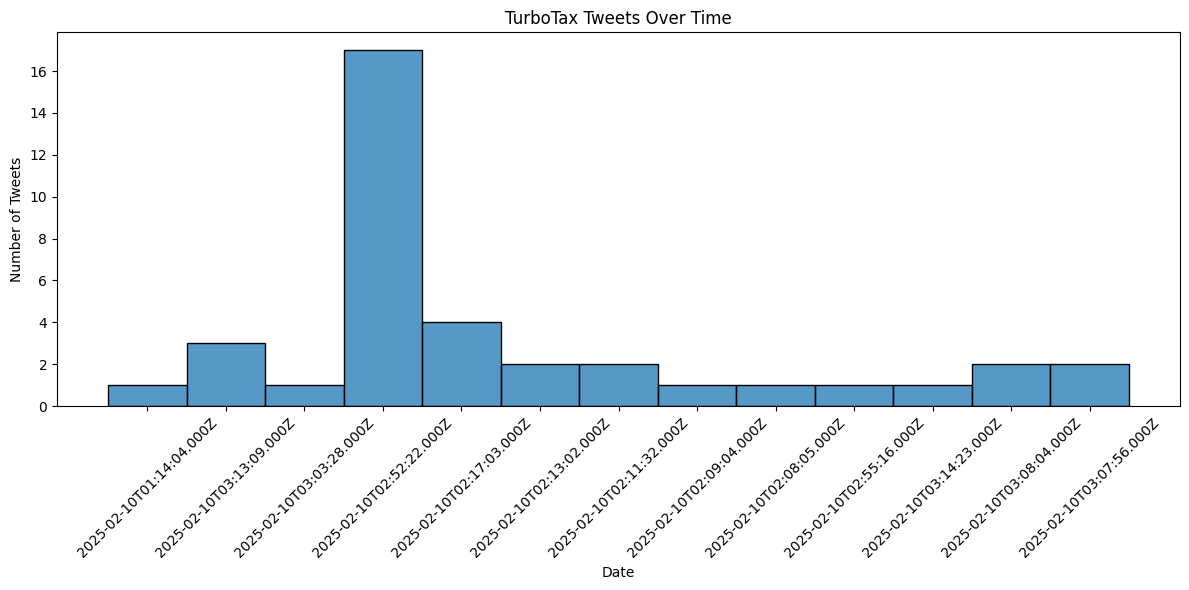

In [ ]:
# Filter tweets for TurboTax
turbotax_tweets = tweet_25_df[tweet_25_df['text'].str.contains("TurboTax", na=False, flags=re.IGNORECASE)]

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(turbotax_tweets['created_at'], kde=False, bins=30)
plt.title('TurboTax Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Total Impression of Brand**

In [ ]:
impression_count_by_brand = tweet_25_df.groupby("brand", as_index=False)["public_metrics.impression_count"].sum()

In [ ]:
print(impression_count_by_brand)

                   brand  public_metrics.impression_count
0             Angel Soft                            43432
1            Booking.com                            39742
2                  Bosch                            52953
3              Bud Light                           342486
4              Budweiser                             1191
5            Busch Light                            54679
6                 Cirkul                             8237
7            Coffee mate                            38803
8            Coors Light                            40588
9                 Disney                           672066
10              DoorDash                          1661968
11               Doritos                          1154171
12                  Dove                            77867
13               Dunkin'                          2450313
14              Duracell                             4466
15                  FCAS                             7093
16            

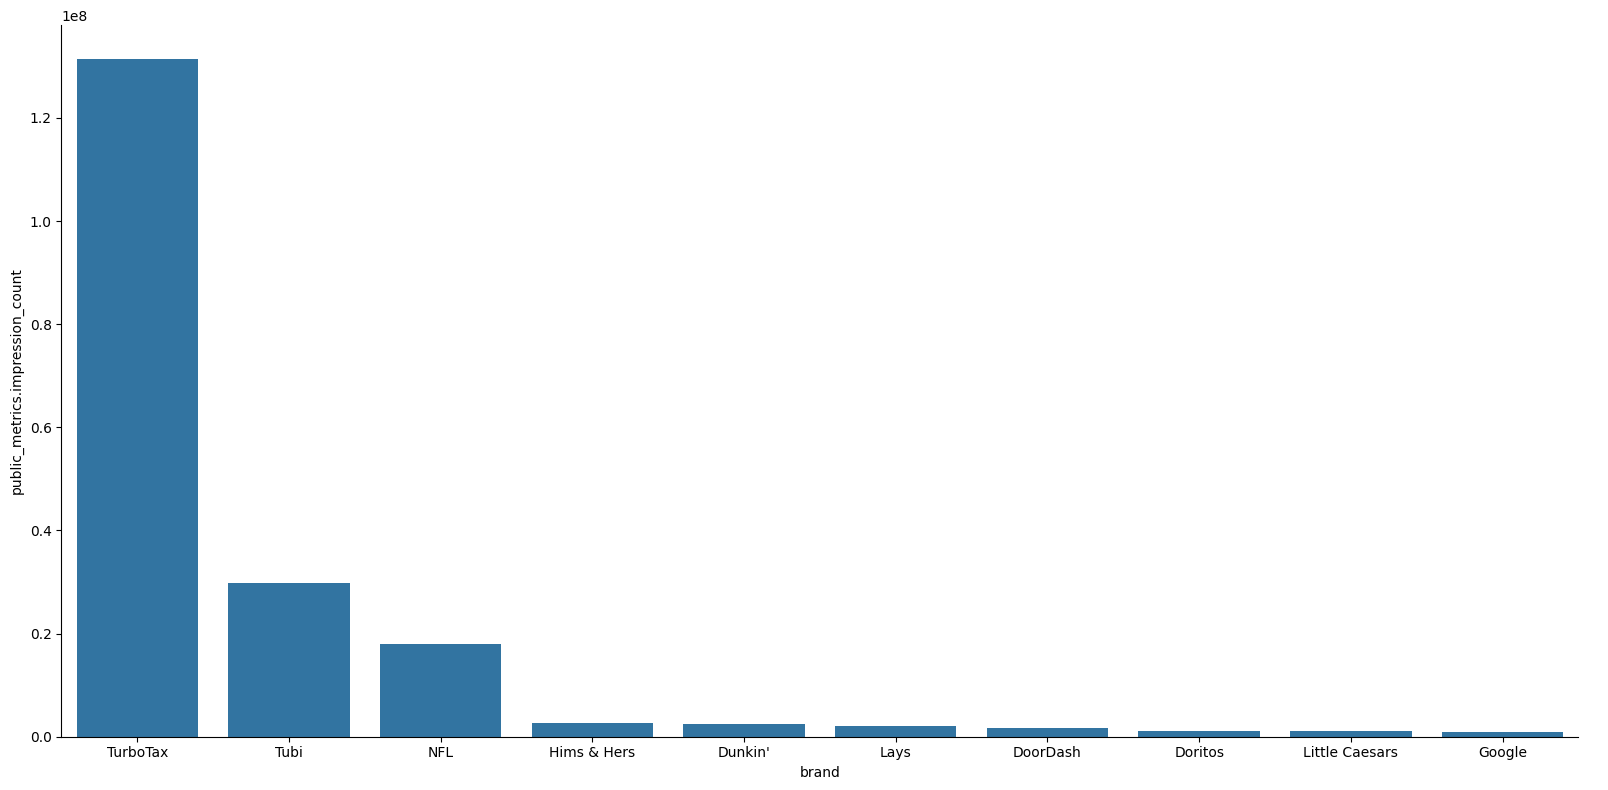

In [ ]:
sns.catplot(data = impression_count_by_brand.sort_values("public_metrics.impression_count", ascending=False).head(10), y = "public_metrics.impression_count", x = "brand", kind = "bar",height=8, aspect=2)

# **Total Engagement of Brand**

In [ ]:
engagement_count_by_brand = tweet_25_df.groupby("brand", as_index=False)[
    ["public_metrics.retweet_count", "public_metrics.reply_count", "public_metrics.like_count", "public_metrics.quote_count"]
].sum()

engagement_count_by_brand["total_engagement"] = (
    engagement_count_by_brand["public_metrics.retweet_count"] +
    engagement_count_by_brand["public_metrics.reply_count"] +
    engagement_count_by_brand["public_metrics.like_count"] +
    engagement_count_by_brand["public_metrics.quote_count"]
)

engagement_count_by_brand = engagement_count_by_brand[["brand", "total_engagement"]].reset_index(drop=True)

In [ ]:
print(engagement_count_by_brand)

                   brand  total_engagement
0             Angel Soft               347
1            Booking.com              6109
2                  Bosch               486
3              Bud Light           1185417
4              Budweiser             72836
5            Busch Light              2131
6                 Cirkul             13180
7            Coffee mate            177710
8            Coors Light              2338
9                 Disney          22041286
10              DoorDash           1213185
11               Doritos           6204196
12                  Dove             83550
13               Dunkin'           1466597
14              Duracell              3803
15                  FCAS              6355
16               FanDuel            115800
17                 Fetch             11907
18               GoDaddy              1346
19                Google           5782823
20          Häagen-Dazs              7446
21            Hellmann's            110280
22         

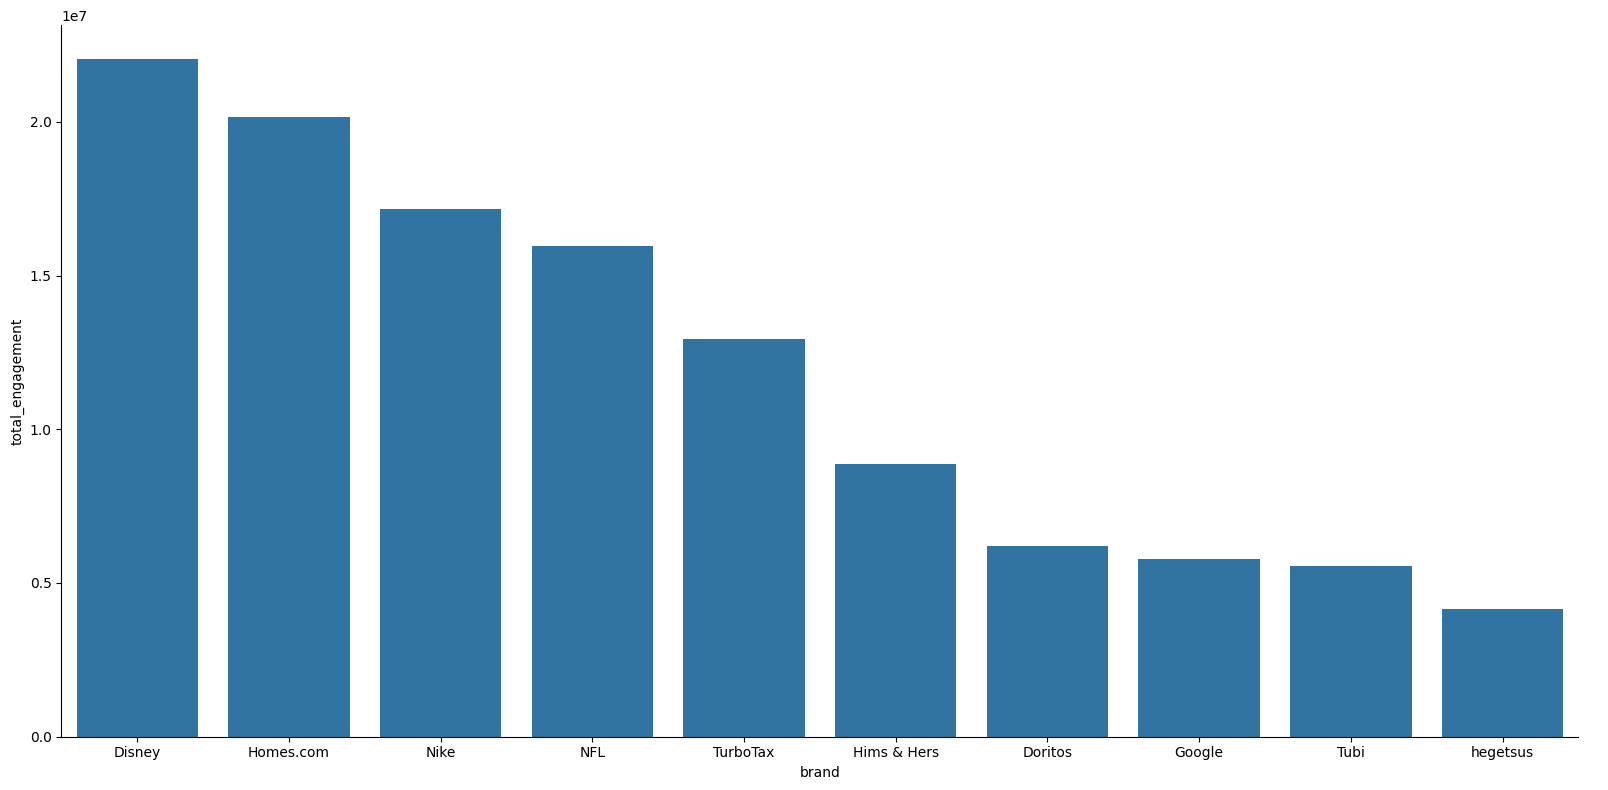

In [ ]:
sns.catplot(data = engagement_count_by_brand.sort_values("total_engagement", ascending= False).head(10), y = "total_engagement", x = "brand", kind = "bar",height=8, aspect=2)

# **Engagement Rates of Brands**

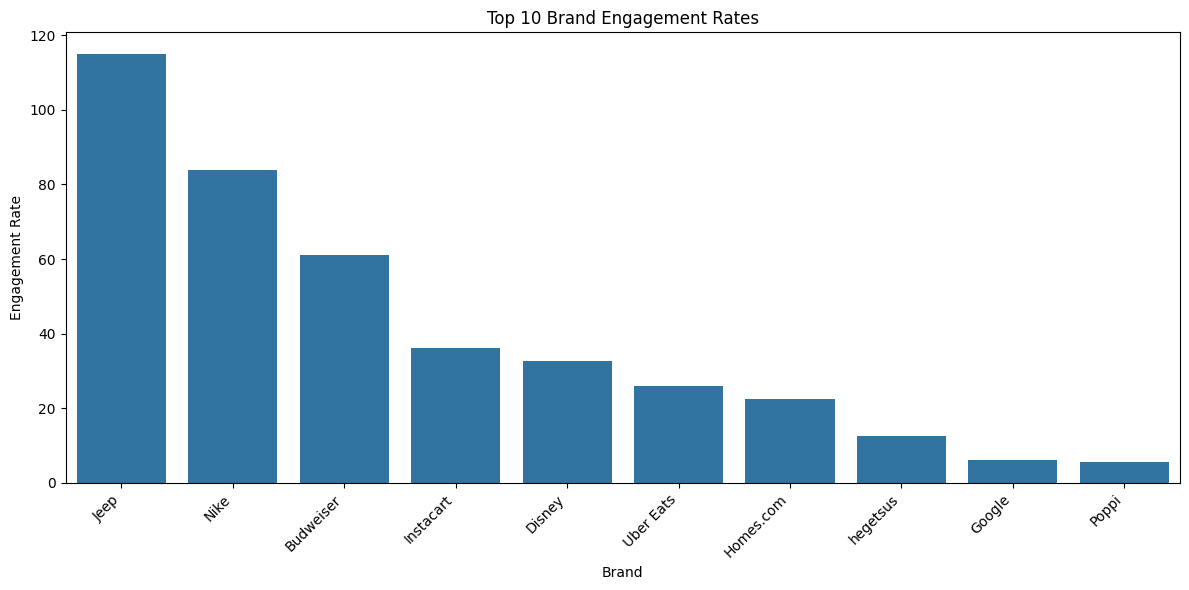

In [ ]:
# Ensure impression data exists
if "public_metrics.impression_count" not in impression_count_by_brand.columns:
    raise ValueError("Impression count column not found in impression_count_by_brand!")

# Merge engagement and impression data
merged_df = engagement_count_by_brand.merge(impression_count_by_brand, on="brand", how="inner")

# Compute engagement rate
merged_df["engagement_rate"] = merged_df["total_engagement"] / merged_df["public_metrics.impression_count"]

# Sort brands by engagement rate
top_brands = merged_df.sort_values(by="engagement_rate", ascending=False).head(10)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='engagement_rate', data=top_brands)
plt.title('Top 10 Brand Engagement Rates')
plt.xlabel('Brand')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Function to extract hashtags
def extract_hashtags(hashtags_str):
    try:
        hashtags_list = ast.literal_eval(hashtags_str)
        return [item['tag'] for item in hashtags_list]
    except (ValueError, SyntaxError):
        return []

# Filter for Disney brand
disney_tweets = tweet_25_df[tweet_25_df['brand'] == 'Disney'].copy()

# Apply the extraction function safely
disney_tweets.loc[:, 'hashtags'] = disney_tweets['entities.hashtags'].apply(extract_hashtags)

# Flatten and count hashtags
all_disney_hashtags = Counter([tag for hashtags in disney_tweets['hashtags'] for tag in hashtags])

# Convert to DataFrame
disney_hashtag_df = pd.DataFrame(all_disney_hashtags.items(), columns=['Hashtag', 'Count']).sort_values(by='Count', ascending=False)

# Add '#' for readability
disney_hashtag_df['Hashtag'] = disney_hashtag_df['Hashtag'].apply(lambda x: f"#{x}")



In [ ]:
# Display result
disney_hashtag_df

,Hashtag,Count
1,#Thunderbolts,693
0,#LiloAndStitch,244
38,#SuperBowl,68
111,#CaptainAmericaBraveNewWorld,58
18,#SuperBowlLIX,57
...,...,...
94,#StarWarsCelebration,1
201,#KansasCityChiefs,1
202,#KansasCity,1
93,#StarWarsfanart,1


In [ ]:
# prompt: Export tweet_25_df to csv

tweet_25_df.to_csv('tweet_25_df.csv', index=False)
from google.colab import files
files.download('tweet_25_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Resample tweet counts per 30-minute intervals using '30min'
# new_tweets_df = tweet_25_df.resample('30min', on='created_at_mst').size().reset_index(name='tweet_count')

# Plot the time series
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(new_tweets_df['created_at_mst'], new_tweets_df['tweet_count'], marker='o', linestyle='-', linewidth=2)
# plt.title('Tweet Counts per 30-Minute Interval (MST)')
# plt.xlabel('Time (MST)')
# plt.ylabel('Number of Tweets')
# plt.grid(True)
# plt.show()

In [ ]:
# turbotax hashtags yo Phuc
# prompt: I want to make a word frequency cloud of the hashtags from turbotax_hashtags_df

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming disney_hashtags_df is already created and contains the 'hashtag' column

# Combine all hashtags into a single string
text = " ".join(turbotax_hashtags_df['hashtag'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

NameError: name 'turbotax_hashtags_df' is not defined

In [ ]:
# disney hashtags yo Phuc
# prompt: I want to make a word frequency cloud of the hashtags from disney_hashtags_df

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming disney_hashtags_df is already created and contains the 'hashtag' column

# Combine all hashtags into a single string
text = " ".join(disney_hashtags_df['hashtag'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# prompt: make a heat map  of the correleation of like count, reply, retweet and quote

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tweet_25_df' DataFrame is already loaded and processed

# Select the relevant columns for correlation analysis
engagement_metrics = tweet_25_df[['public_metrics.like_count', 'public_metrics.reply_count',
                                 'public_metrics.retweet_count', 'public_metrics.quote_count']]

# Calculate the correlation matrix
correlation_matrix = engagement_metrics.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()


In [ ]:
# prompt: give me the most count hashtag table fix the code more than single most

import pandas as pd
def extract_hashtags(hashtags_str):
    try:
        hashtags_list = ast.literal_eval(hashtags_str)
        return [item['tag'] for item in hashtags_list]
    except (ValueError, SyntaxError):
        return []

def get_top_hashtags(df, brand_name, top_n=10):
    # Filter for the specified brand
    brand_tweets = df[df['brand'] == brand_name].copy()

    # Extract hashtags
    brand_tweets['hashtags'] = brand_tweets['entities.hashtags'].apply(extract_hashtags)

    # Flatten and count hashtags
    all_hashtags = [tag for hashtags in brand_tweets['hashtags'] for tag in hashtags]
    hashtag_counts = Counter(all_hashtags)

    # Convert to DataFrame and sort
    hashtag_df = pd.DataFrame(hashtag_counts.most_common(top_n), columns=['Hashtag', 'Count'])
    hashtag_df['Hashtag'] = hashtag_df['Hashtag'].apply(lambda x: f"#{x}")

    return hashtag_df

# Example usage (replace with your desired brand)
disney_top_hashtags = get_top_hashtags(tweet_25_df, "Disney", top_n=20)
print(disney_top_hashtags)

turbotax_top_hashtags = get_top_hashtags(tweet_25_df, "TurboTax", top_n=20)
turbotax_top_hashtags


                         Hashtag  Count
0                  #Thunderbolts    693
1                 #LiloAndStitch    244
2                     #SuperBowl     68
3   #CaptainAmericaBraveNewWorld     58
4                  #SuperBowlLIX     57
5                  #thunderbolts     52
6                 #MarvelStudios     44
7                      #zonauang     38
8                  #MarvelRivals     26
9                   #THUNDERBOWL     24
10                 #THUNDERBOLTS     23
11                       #marvel     22
12                         #eBay     21
13                       #Marvel     19
14                       #sentry     18
15                          #MCU     18
16                    #zonajajan     18
17         #TodayInMarvelHistory     17
18                 #lewispullman     17
19                     #STARWARS     16


,Hashtag,Count
0,#SBLIX,9963
1,#DoritosCrash,820
2,#FlyEaglesFly,704
3,#SuperBowl,537
4,#SuperBowlLIX,422
5,#Sweepstakes,232
6,#NFL,193
7,#ThisBudsForYou,141
8,#OnlyLays,116
9,#SUPERBOWL,110


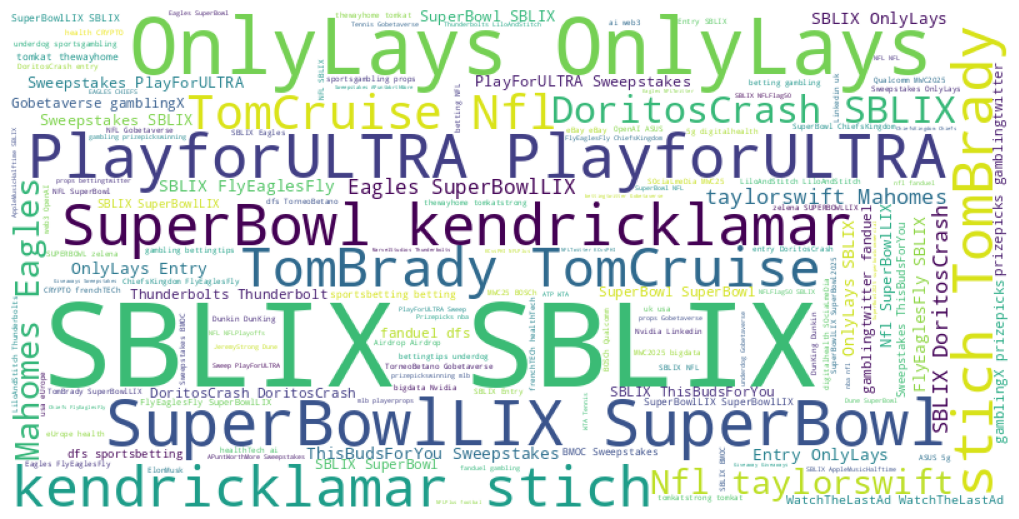

In [ ]:
# prompt: generate a word cloud for all hashtags

# Assuming new_engagement_df is already defined and contains a 'entities.hashtags' column.

all_hashtags = []
for index, row in tweet_25_df.iterrows():
    if isinstance(row['entities.hashtags'], str):
        try:
            hashtags = eval(row['entities.hashtags'])
            if isinstance(hashtags, list):
                for hashtag in hashtags:
                    all_hashtags.append(hashtag['tag'])
        except (SyntaxError, TypeError):
            # Handle cases where the string representation is invalid
            print(f"Skipping invalid hashtag string at index {index}: {row['entities.hashtags']}")
    elif isinstance(row['entities.hashtags'], list):
        for hashtag in row['entities.hashtags']:
            all_hashtags.append(hashtag['tag'])

# Combine all hashtags into a single string
text = " ".join(all_hashtags)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# prompt: generate a table for the above hashtags

from IPython.display import display, HTML

# Assuming disney_hashtag_df is already created as in your provided code

def display_dataframe_as_table(df):
  """Displays a Pandas DataFrame as an HTML table."""
  html_table = df.to_html(index=False)
  display(HTML(html_table))

display_dataframe_as_table(tweet_25_df)


Buffered data was truncated after reaching the output size limit.

In [ ]:
# prompt: i want to see the location distribution of each tweet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming tweet_25_df is your DataFrame
# and it contains a 'geo.place_full_name' column (or similar) representing location

# Check if 'geo.place_full_name' column exists and handle missing values
if 'geo.place_full_name' in tweet_25_df.columns:
    location_counts = tweet_25_df['geo.place_full_name'].value_counts()
    # If you want to filter locations with less than 5 counts for better visualization
    location_counts = location_counts[location_counts > 4]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x=location_counts.index, y=location_counts.values)
    plt.xticks(rotation=90)
    plt.xlabel("Location")
    plt.ylabel("Number of Tweets")
    plt.title("Tweet Location Distribution")
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

else:
    print("The 'geo.place_full_name' column does not exist in the DataFrame. Please provide the correct column name or check the data.")


# Example using a different column if 'geo.place_full_name' is not available
# Replace 'your_location_column' with the actual column name

# if 'your_location_column' in tweet_25_df.columns:
#     location_counts = tweet_25_df['your_location_column'].value_counts()
#     # ... (rest of the plotting code)


In [ ]:
# prompt: Calculate sentiment score of each tweet and draw a bar chart that show in descending of by the top 10 of the sentiment group by brand

# Assuming 'tweet25_df' and 'analyzer' are already defined as in the previous code.
# Sorted from z to a based on positive score

# Calculate sentiment scores for all brands first
sentiment_scores_by_brand = {}
for brand in new_engagement_df['brand'].unique():  # Iterate through all unique brands
    brand_tweets = new_engagement_df[engagement_df['brand'] == brand]
    positive_count = 0
    negative_count = 0
    for tweet in brand_tweets['text'].astype(str):
        scores = analyzer.polarity_scores(tweet)
        if scores['compound'] >= 0.5:
            positive_count += 1
        elif scores['compound'] <= -0.05:
            negative_count += 1
    sentiment_scores_by_brand[brand] = {'positive': positive_count, 'negative': negative_count}

# Sort brands based on positive and negative score in descending order
sorted_brands = sorted(sentiment_scores_by_brand.items(), key=lambda x: (x[1]['positive'], x[1]['negative']), reverse=True)

# Select the top 10 brands
top_10_brands = sorted_brands[:10]  # Take only the first 10 brands

# Prepare data for the bar chart using the selected top 10
brands = [brand for brand, scores in top_10_brands]
positive_counts = [scores['positive'] for brand, scores in top_10_brands]
negative_counts = [scores['negative'] for brand, scores in top_10_brands]

# Create the bar chart
plt.figure(figsize=(12, 6))
X_axis = range(len(brands))
plt.bar(X_axis, positive_counts, 0.4, label='Positive')
plt.bar([x + 0.4 for x in X_axis], negative_counts, 0.4, label='Negative')
plt.xticks([x + 0.2 for x in X_axis], brands, rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Sentiment Count')
plt.title('Top 10 Brands by Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()

#